In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.feature_selection import RFE

In [2]:
df = pd.read_csv(r"C:\Users\trush\OneDrive\Documents\WFU Grad School Info\BAN 6025 Machine Learning\baseball_salary.csv")
df.head()

,name,team,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,...,cr_runs,cr_rbi,cr_bb,no_outs,no_assts,no_error,salary,league,division,position
0,"Robidoux, Billy Jo",Milwaukee,181,41,1,15,21,33,2,232,...,20,29,45,326,29,5,67.5,American,East,1B
1,"Kingery, Mike",KansasCity,209,54,3,25,14,12,1,209,...,25,14,12,102,6,3,68.0,American,West,OF
2,"Braggs, Glenn",Milwaukee,215,51,4,19,18,11,1,215,...,19,18,11,116,5,12,70.0,American,East,LF
3,"Ford, Curt",StLouis,214,53,2,30,29,23,2,226,...,32,32,27,109,7,3,70.0,National,East,OF
4,"Newman, Al",Montreal,185,37,1,23,8,21,2,214,...,30,9,24,76,127,7,70.0,National,East,2B


In [3]:
df = df.drop(columns=['name', 'team', 'league', 'division', 'position'])
df.head()

,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_hits,cr_home,cr_runs,cr_rbi,cr_bb,no_outs,no_assts,no_error,salary
0,181,41,1,15,21,33,2,232,50,4,20,29,45,326,29,5,67.5
1,209,54,3,25,14,12,1,209,54,3,25,14,12,102,6,3,68.0
2,215,51,4,19,18,11,1,215,51,4,19,18,11,116,5,12,70.0
3,214,53,2,30,29,23,2,226,59,2,32,32,27,109,7,3,70.0
4,185,37,1,23,8,21,2,214,42,1,30,9,24,76,127,7,70.0


In [4]:
#Display the summary statistics of the dataframe
print(df.describe())

         no_atbat     no_hits     no_home     no_runs      no_rbi       no_bb  \
count  263.000000  263.000000  263.000000  263.000000  263.000000  263.000000   
mean   408.285171  109.159696   11.825095   55.490494   52.288973   41.722433   
std    142.633058   43.993289    8.826131   25.073763   25.713189   21.507032   
min    127.000000   32.000000    0.000000   13.000000    8.000000    3.000000   
25%    285.500000   73.000000    5.000000   34.000000   31.000000   24.000000   
50%    416.000000  108.000000    9.000000   53.000000   47.000000   37.000000   
75%    527.000000  142.000000   18.000000   73.000000   71.500000   57.500000   
max    687.000000  238.000000   40.000000  130.000000  121.000000  105.000000   

         yr_major      cr_atbat      cr_hits     cr_home     cr_runs  \
count  263.000000    263.000000   263.000000  263.000000   263.00000   
mean     7.391635   2700.889734   733.920152   71.471483   368.08365   
std      4.790521   2290.314119   648.901189   86.0405

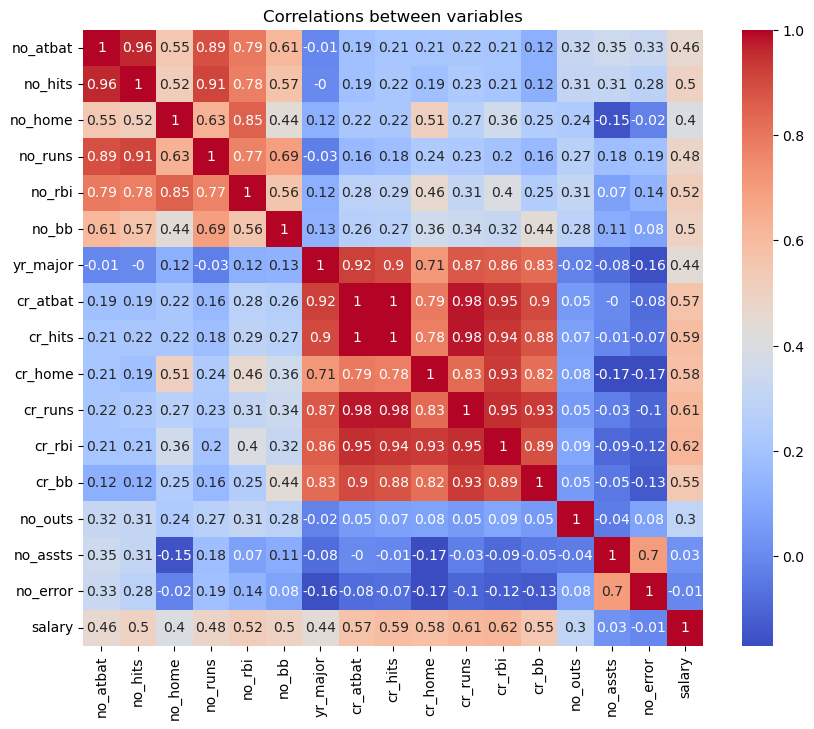

In [5]:
#Correlation matrix
correl = df.corr()

#Round the correlations to 2 decimal places
correl = correl.round(2)

#Create a heatmap with the correlations red = high blue = low
plt.figure(figsize=(10,8))
sns.heatmap(correl,annot=True, cmap='coolwarm')
plt.title('Correlations between variables')
plt.show()

In [6]:
#Linear Regression
X = df.drop(columns=['salary'])
y = df['salary']

#Adds in the intercept to the regression equation
X = sm.add_constant(X)

#OLS is fits the regression
full_regression = sm.OLS(y,X).fit()

#Display Results
print(full_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.582
Method:                 Least Squares   F-statistic:                     23.79
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           3.73e-41
Time:                        09:47:24   Log-Likelihood:                -1857.1
No. Observations:                 263   AIC:                             3748.
Df Residuals:                     246   BIC:                             3809.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.9314     80.333     -0.447      0.6

In [7]:
#VIF
vifries = pd.DataFrame()
vifries['Variable'] = X.columns

#Calculate the variance inflation factor for each column in the dataset
vifries['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vifries)


    Variable         VIF
0      const   19.948458
1   no_atbat   21.476555
2    no_hits   28.446736
3    no_home    7.731020
4    no_runs   14.542138
5     no_rbi   11.465480
6      no_bb    3.968938
7   yr_major    9.236838
8   cr_atbat  249.851404
9    cr_hits  497.072822
10   cr_home   50.069392
11   cr_runs  161.019424
12    cr_rbi  134.744542
13     cr_bb   20.477142
14   no_outs    1.256380
15  no_assts    2.716512
16  no_error    2.195590


In [9]:
df = pd.read_csv(r"C:\Users\trush\OneDrive\Documents\WFU Grad School Info\BAN 6025 Machine Learning\baseball_salary.csv")

In [10]:
adjusted_df = df.drop(columns=['name', 'team', 'league', 'division', 'position', 'cr_hits'])

adjusted_df.head()

,no_atbat,no_hits,no_home,no_runs,no_rbi,no_bb,yr_major,cr_atbat,cr_home,cr_runs,cr_rbi,cr_bb,no_outs,no_assts,no_error,salary
0,181,41,1,15,21,33,2,232,4,20,29,45,326,29,5,67.5
1,209,54,3,25,14,12,1,209,3,25,14,12,102,6,3,68.0
2,215,51,4,19,18,11,1,215,4,19,18,11,116,5,12,70.0
3,214,53,2,30,29,23,2,226,2,32,32,27,109,7,3,70.0
4,185,37,1,23,8,21,2,214,1,30,9,24,76,127,7,70.0


In [11]:
#Linear Regression
X = adjusted_df.drop(columns=['salary'])
y = adjusted_df['salary']

#Adds in the intercept to the regression equation
X = sm.add_constant(X)

#OLS is fits the regression
full_regression = sm.OLS(y,X).fit()

#Display Results
print(full_regression.summary())

                            OLS Regression Results                            
Dep. Variable:                 salary   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.584
Method:                 Least Squares   F-statistic:                     25.48
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           7.25e-42
Time:                        09:47:49   Log-Likelihood:                -1857.1
No. Observations:                 263   AIC:                             3746.
Df Residuals:                     247   BIC:                             3803.
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        -35.9821     80.156     -0.449      0.6

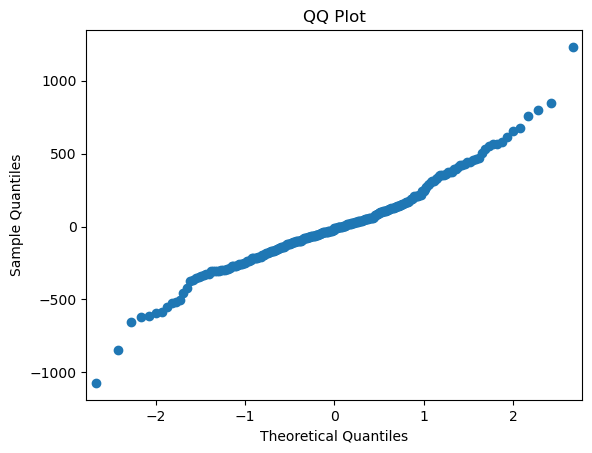

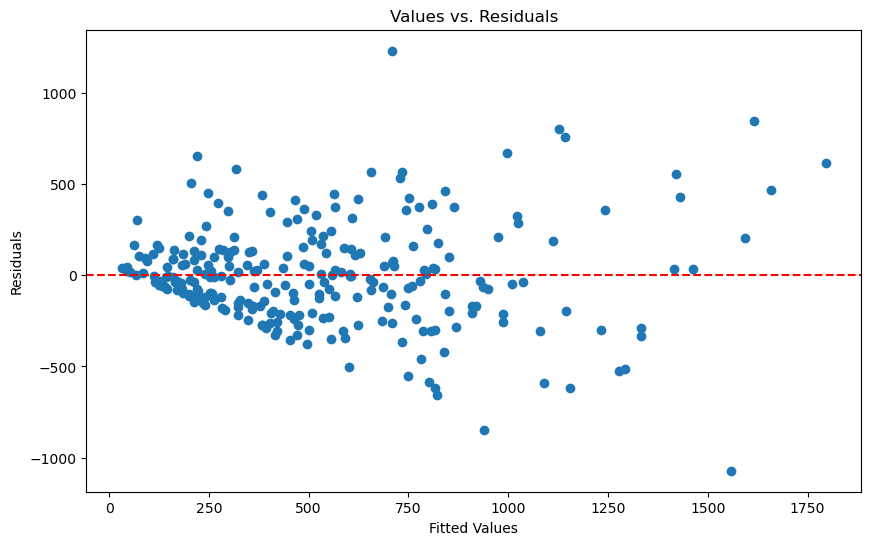

In [17]:
residuals = full_regression.resid

fig = sm.qqplot(residuals)
plt.title('QQ Plot')
plt.show()

plt.figure(figsize=(10,6))
plt.scatter(full_regression.fittedvalues, residuals)
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Values vs. Residuals')
plt.axhline(0, color='r', linestyle='--')
plt.show()